# 📊 直方图 (Histogram) - 数据分布分析

## 什么是直方图？

直方图将数据分成若干个"桶"（bin），展示每个桶中数据的**频率分布**。它是探索性数据分析（EDA）的核心工具。

## 适用场景

| 场景 | 示例 |
|------|------|
| 查看目标变量分布 | 奖牌数的分布是否正态？ |
| 识别偏态 | 数据是左偏还是右偏？ |
| 发现异常值 | 是否有离群点？ |
| 选择模型依据 | 线性模型假设正态分布 |

## 关键指标解读

- **右偏（正偏）**：尾巴向右延伸，均值 > 中位数 → 可能需要对数变换
- **左偏（负偏）**：尾巴向左延伸，均值 < 中位数
- **双峰分布**：可能存在两个子群体，考虑分组建模
- **均匀分布**：数据均匀分散，无明显集中趋势


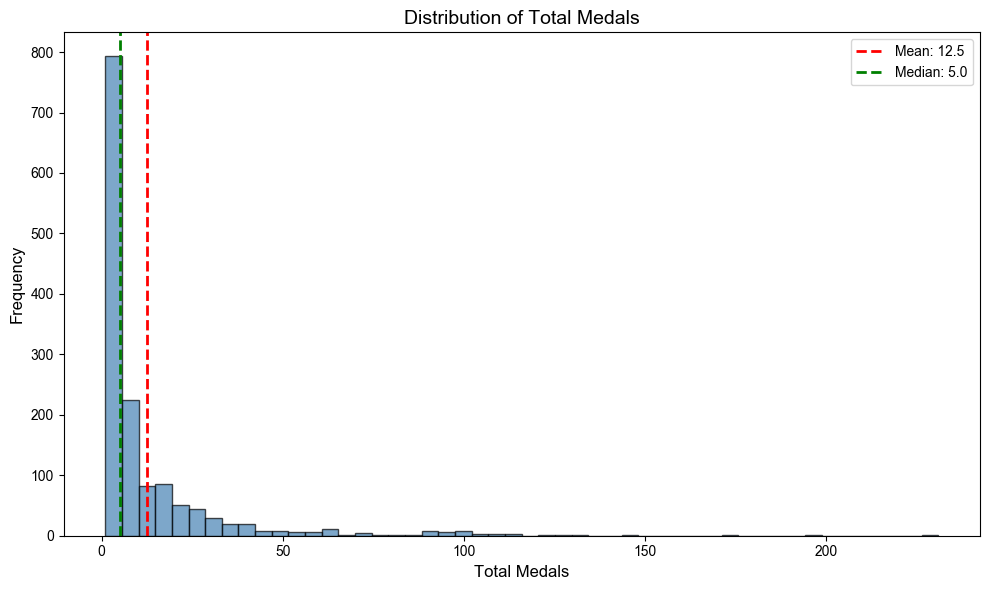

📊 分布统计:
  均值: 12.46
  中位数: 5.00
  标准差: 21.58
  偏度: 3.92 (右偏)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 加载示例数据
df = pd.read_csv('../preprocessing/2025C示例/processed_medal_data.csv')

# 绘制直方图
fig, ax = plt.subplots(figsize=(10, 6))

# 绑定数据
data = df['Total']

# 绘制直方图
ax.hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')

# 添加均值和中位数参考线
ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.1f}')
ax.axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.1f}')

# 设置标签
ax.set_xlabel('Total Medals', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Total Medals', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()

# 输出统计信息
print("📊 分布统计:")
print(f"  均值: {data.mean():.2f}")
print(f"  中位数: {data.median():.2f}")
print(f"  标准差: {data.std():.2f}")
print(f"  偏度: {data.skew():.2f} ({'右偏' if data.skew() > 0 else '左偏' if data.skew() < 0 else '对称'})")


## 🎯 2025美赛C题解读

### 图形分析结论

从上面的直方图我们可以观察到：

**1. 极度右偏分布（偏度=3.92）**
- 均值(12.46) >> 中位数(5.00)，这是典型的右偏分布特征
- 大部分国家获得的奖牌数很少（0-10枚），只有少数体育强国获得大量奖牌

**2. 对建模的启示**
- ⚠️ **不能直接使用线性回归假设**：因为数据不是正态分布
- ✅ **建议方案**：
  - 对`Total`做**对数变换**（log(Total+1)）使其更接近正态
  - 或使用对右偏不敏感的模型（如随机森林、XGBoost）

**3. 业务含义**
- 奥运奖牌呈现**"强者恒强"**的马太效应
- 大约75%的记录奖牌数≤13枚（Q3位置）
- 超过50枚奖牌的属于**超级体育强国**（美国、中国、俄罗斯等）

### 答题建议
在论文中描述数据分布时，可以写：
> "奖牌总数呈现显著右偏分布（偏度=3.92），中位数仅为5枚，而均值达12.5枚，表明奥运奖牌集中在少数体育强国手中。"
